In [1]:
from common import *
from matrix import *

/home/ec2-user/anaconda3/lib/python3.6/site-packages/pandas/core/common.py:701: RuntimeWarning: divide by zero encountered in log
  return func(obj, *args, **kwargs)


In [2]:
%matplotlib notebook
canvas(9, 6)

# Matrix Factorization

In [3]:
from scipy.stats import norm

In [4]:
def_matrices(globals(), df) #day_filter(df, 246))

In [5]:
sfilt = ~stock_nvdf(dh, 246)

In [123]:
# T-SNE
# unnormalized y.T: perplexity=2 (n_iter=10000)
# normalized y.T: perplexity=10 (n_iter=1000)

In [29]:
_zero = -15.
Wlogstd = np.log(W).pipe(lambda X: (X - X.mean()) / X.var() ** .5)
Wlogstda = Wlogstd.fillna(_zero)
Wlogmstd = np.log(W).pipe(lambda X: (X - X.median()) / X.var() ** .5)
Wlogmstda = Wlogmstd.fillna(_zero)
Wlogmscl = np.log(W).pipe(lambda X: (X - X.median()) / ((X - X.median()) ** 2).mean() ** .5)
Wlogmscla = Wlogmscl.fillna(_zero)
#Waqtl = W.fillna(0).qtl()
#Wanrm = Wapct.pipe(norm.ppf) + Wapct * 0
Wsqrtstd = (W ** .5).pipe(lambda X: (X - X.mean()) / X.var() ** .5)
Wsqrtstda = Wsqrtstd.fillna(_zero)
Wsqrtmstd = (W ** .5).pipe(lambda X: (X - X.median()) / X.var() ** .5)
Wsqrtmstda = Wsqrtmstd.fillna(_zero)
Wsqrtmscl = (W ** .5).pipe(lambda X: (X - X.median()) / ((X - X.median()) ** 2).mean() ** .5)
Wsqrtmscla = Wsqrtmscl.fillna(_zero)

In [122]:
mat = Wanrm

In [123]:
pearson = mat.corr(method='pearson')

In [54]:
spearman = mat.corr(method='spearman')

In [70]:
kendall = pd.DataFrame(np.load(top_dir + 'data/progress/kendalltau.npy'), index=range(N_STOCK), columns=range(N_STOCK))
kendall.columns.name = kendall.index.name = 'Stock'

In [124]:
dist = pearson ** -2 - 1 #kendall[sfilt].T[sfilt].T ** -2 - 1
#dist = dist.replace(np.inf, dist.replace(np.inf, 0).max().max() ** 2)
dist = dist.fillna(0)

In [7]:
G = pd.read_hdf(top_dir + 'data/analysis/G1.hdf5')
group = pd.read_hdf(top_dir + 'data/analysis/group1.hdf5')

In [14]:
def_WY(globals(), df); def_analysis(globals())

NameError: name 'def_WY' is not defined

In [10]:
for i in range(12):
    print('{:20f}'.format(stock_importance__wmean[group == i].sum()), G.columns[i])

      9933334.447703 big1
      5780693.811794 big2
     17721437.293402 big3
      1286262.848940 sml2
      1675893.588941 sml3
      1618001.079101 sml3x
      3073242.439507 tny1
       209659.315252 tny2
      1813372.824045 twa4
      1333444.493551 twb4
      8713726.962270 ltl
     26028182.823557 lrg


In [30]:
_cond = (group == 10) | (group == 11)
for m in range(1, 5):
    print('{:20f}'.format(stock_importance__wmean[_cond & (market == m)].sum()), G.columns[i])

      6948038.527055 lrg
     11768187.729252 lrg
     11037394.789533 lrg
      4988288.739986 lrg


In [91]:
o = O()
def_W(o, dh)
def_X(o, dh, include='logs z1 z3 z4', feats=xfeats)

/home/ec2-user/anaconda3/lib/python3.6/site-packages/pandas/core/common.py:701: RuntimeWarning: divide by zero encountered in log
  return func(obj, *args, **kwargs)


In [97]:
dude = o.Xlogz1msa.fillna(0)
#dude.columns = dude.columns.droplevel(0)

In [31]:
from sklearn.manifold import TSNE
cond = (market == 3)
#theX = dude.T.swaplevel(axis=0).unstack()[cond]
theX = Wlogmscla.T[cond] #np.log(W.fillna(W.min().min() ** 2)).T
#theX = center(theX)
vis = TSNE(n_components=2, perplexity=20, n_iter=5000).fit_transform(theX)

<IPython.core.display.Javascript object>


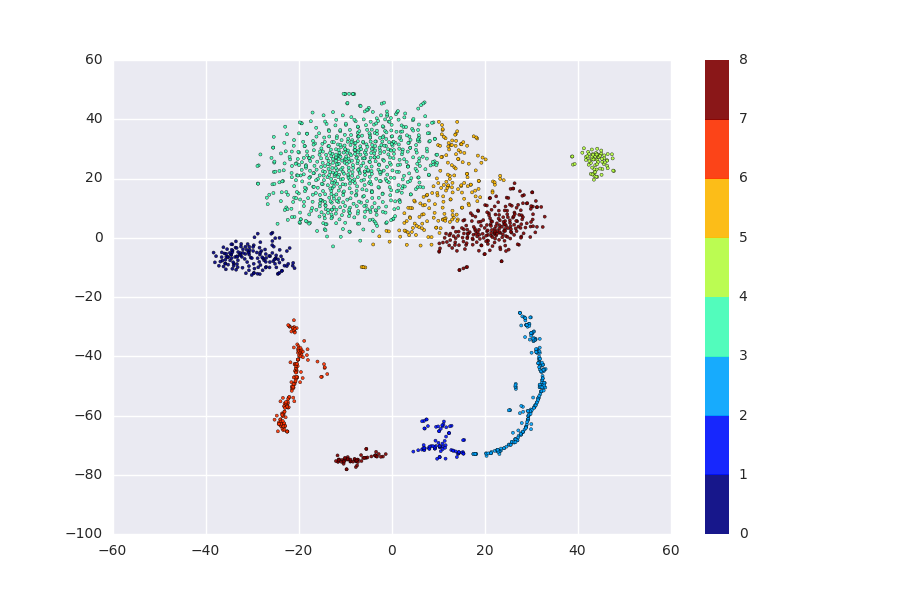

In [129]:
from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure()
#ax = Axes3D(fig)
vis = np.load(top_dir + 'data/analysis/tsne_vis/m3_Wmscla-15_tsne_p30_5000.npy')
###+0*(4-market*~G.rst)
plt.scatter(vis[:, 0], vis[:, 1], s=5, alpha=.9, c=group, cmap=plt.get_cmap('jet', 8));
plt.colorbar(ticks=list(range(9)));

In [131]:
vis = np.load(top_dir + 'data/analysis/tsne_vis/m3_Wmscla-15_tsne_p30_5000.npy')
x, y = vis[:, 0], vis[:, 1]
above = lambda x0, y0, x1, y1: y - y0 >= (y1 - y0) / (x1 - x0) * (x - x0)
below = lambda x0, y0, x1, y1: y - y0 <= (y1 - y0) / (x1 - x0) * (x - x0)
#
g = O()
g.m3_LargeSiamese = above(-3, 0, 10, 22) & above(-10, -7, -30, 5) & (x > -30) & (y < 50) & (x < 10)
g.m3_SmallSiamese = (y > -12) & (x > 9) & below(10, 0, 25, 19) & (y < 20) & (x < 35)
g.m3_MiddleSiamese = (above(10, 0, 25, 19) | (x < 10)) & (y > -12) & (below(-3, 0, 10, 22) | (x >= 10)) & below(30, 20, 20, 40)
g.m3_BigBrother = below(-10, -7, -30, 5) & (x < -20) & (y > -15) & (x > -40) & (y < 6)
g.m3_LittleBrother = (x < 50) & (x > 36) & (y > 8) & (y < 32)
g.m3_Collarbone = (y < -20) & (y > -75) & (x < 40) & (x > 17)
g.m3_BoneGrowth = (y < -60) & (y > -80) & (x <= 17) & (x > 0)
g.m3_SmallSeparate = (y < -70) & (y > -80) & (x < 0) & (x > -15)
g.m3_Sidebar = (y < -25) & (y > -70) & (x < -10) & (x > -30)
#
G = pd.DataFrame(dict(**g), index=theX.index)
Gnum = G.astype(int)
for i, c in enumerate(Gnum.values.T):
    c *= i
group = Gnum.T.sum().T
group.to_hdf(top_dir + 'data/analysis/group.m3.hdf5', key='group')
G.to_hdf(top_dir + 'data/analysis/G.m3.hdf5', key='G')

In [33]:
np.save(top_dir + 'data/analysis/tsne_vis/m3_Wmscla-15_tsne_p20_5000', vis)

In [ ]:
'''# How to do ZCA using sklearn's PCA
# c.f. Michael Eickenberg on Google https://groups.google.com/forum/#!topic/theano-users/_63ggUdWeEI
pca = PCA(whiten=True)
transformed = pca.fit_transform(data)
pca.whiten = False
zca = pca.inverse_transform(transformed)
'''

In [116]:
theY, theW = (Y - Y.mean()).fillna(0).T, W.fillna(0).T
f = skPCA(theY.shape[0], whiten=True)
Yf = f.fit_transform(theY, weights=theW)
f.whiten=False
Ywhiten = f.inverse_transform(Yf)

TypeError: __init__() got an unexpected keyword argument 'whiten'

In [ ]:
# outliers when I didn't remove stocks with not enough valid dates

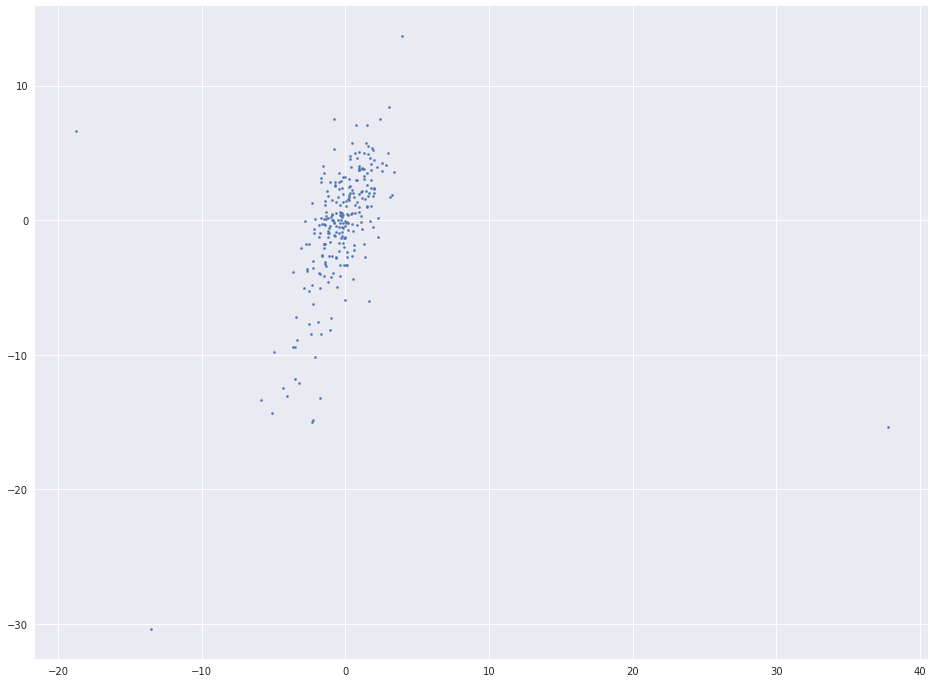

In [201]:
h = plt.scatter(Yf[:, 0], Yf[:, 1], s=5)

In [213]:
(
    (Yf[:, 0] > 30).nonzero() +
    (Yf[:, 0] < -15).nonzero() +
    (Yf[:, 1] < -30).nonzero() +
    (Yf[:, 1] > 10).nonzero() +
())

(array([257]), array([256]), array([253]), array([127]))